# 1D kernel basics

This example will cover:

 - Initialising the GPtide class with a kernel and some 1D data
 - Sampling from the prior
 - Making a prediction at new points
 - Sampling from the conditional distribution

In [1]:
from gptide import cov
from gptide.gpscipy import GPtideScipy
import numpy as np
import matplotlib.pyplot as plt

We use an exponential-quadratic  kernel with a length scale $\ell$ = 100 and variance $\eta$ = $1.5^2$. The noise ($\sigma$) is 0.5. The total length of the domain is 2500 and we sample 100 data points.

In [2]:
####
# These are our kernel input parameters
noise = 0.5
η = 1.5
ℓ = 100
covfunc = cov.expquad_1d

###
# Domain size parameters
dx = 25.
N = 100
covparams = (η, ℓ)

# Input data points
xd = np.arange(0,dx*N,dx)[:,None]



## Initialise the GPtide object and sample from the prior

Text(0.5, 0, 'x')

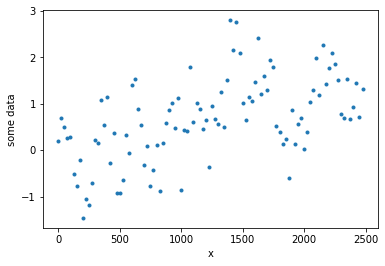

In [3]:
GP = GPtideScipy(xd, xd, noise, covfunc, covparams)

# Use the .prior() method to obtain some samples
yd = GP.prior(samples=1)

plt.figure()
plt.plot(xd, yd,'.')
plt.ylabel('some data')
plt.xlabel('x')

## Make a prediction at new points

Text(0.5, 0, 'x')

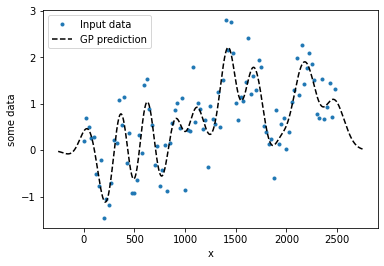

In [4]:
# Output data points 
xo = np.linspace(-10*dx,dx*N+dx*10,N*10)[:,None]

# Create a new object with the output points
GP2 = GPtideScipy(xd, xo, noise, covfunc, covparams)

# Predict the mean
y_mu = GP2(yd)

plt.figure()
plt.plot(xd, yd,'.')
plt.plot(xo, y_mu,'k--')

plt.legend(('Input data','GP prediction'))
plt.ylabel('some data')
plt.xlabel('x')

## Make a prediction of the full conditional distribution at new points

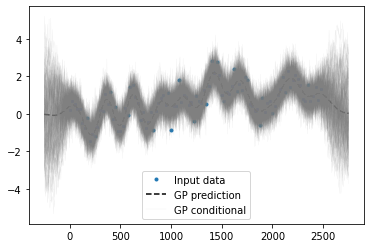

In [5]:
samples = 100
y_conditional = GP2.conditional(yd, samples=samples)

plt.figure()
plt.plot(xd, yd,'.')
plt.plot(xo, y_mu,'k--')

for ii in range(samples):
    plt.plot(xo[:,0], y_conditional[:,ii],'0.5',lw=0.2, alpha=0.2)
    
plt.legend(('Input data','GP prediction','GP conditional'))


You can see from above how the mean prediction returns to zero in the extrapolation region whereas the conditional samples reverts to the prior i.e. it goes all over the place.
